<a href="https://colab.research.google.com/github/huzrulz/Bodyof-work/blob/main/CV_Project1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

• DOMAIN: Botanical research
• CONTEXT: University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classifier capable of determining a plant's species from a
photo

DATA DESCRIPTION: The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/
plant-seedlings-classification/data
• PROJECT OBJECTIVE: University’s management require an automation which can create a classifier capable of
determining a plant's species from a photo
Steps and tasks:
1. Import the data. Analyse the dimensions of the data. Visualise the data.
2. Design, train tune and test the best AIML image classifier model using:
• Supervised learning algorithms
• Neural networks
• CNN
3. Compare the results from the above step along with your detailed observations on the best performing algorithm and
why/how it outperforms other algorithms in this case.
4. Pickle the best performing model.
5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained
image classifier model to predict the class.

In [2]:
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import os
import random as rnd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch.nn.functional as F
#from skimage.color import rgb2gray
import sklearn
import cv2
import tensorflow as tf
from tensorflow import keras
import keras.callbacks as callbacks

import tensorflow.keras.backend as K
# Display
from IPython.display import Image, display
import matplotlib.cm as cm
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn


from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


Mount google colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Kaggle Download

"""
!pip install kaggle==1.5.6
!kaggle -v

!kaggle competitions list -s pneumonia
KAGGLE_DIR = '/content/drive/My Drive/Colab Notebooks/'
%cd {KAGGLE_DIR}
!ls
competition_name = 'plant-seedlings-classification'
!mkdir {competition_name}
DOWNLOAD_DIR = KAGGLE_DIR+competition_name+'/'
print(DOWNLOAD_DIR)
os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_DIR
!kaggle competitions download -c {competition_name}
print('Download Complete')"""

In [3]:
project_path = '/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification'
train_path = '/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train'
test_path = '/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/test'

In [12]:
predict_path = '/content/drive/My Drive/Colab Notebooks/Predict'

In [6]:
images = os.listdir(project_path)

Prepare the train and valid data for passing to the CNN model

In [9]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 32,
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="training")

Found 4760 files belonging to 12 classes.
Using 3808 files for training.


In [10]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=False,
                                                                 image_size=(224,224),
                                                                batch_size = 32,
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="validation")

Found 4760 files belonging to 12 classes.
Using 952 files for validation.


In [11]:
class_names = train_data.class_names
class_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

Display the sample images for each target

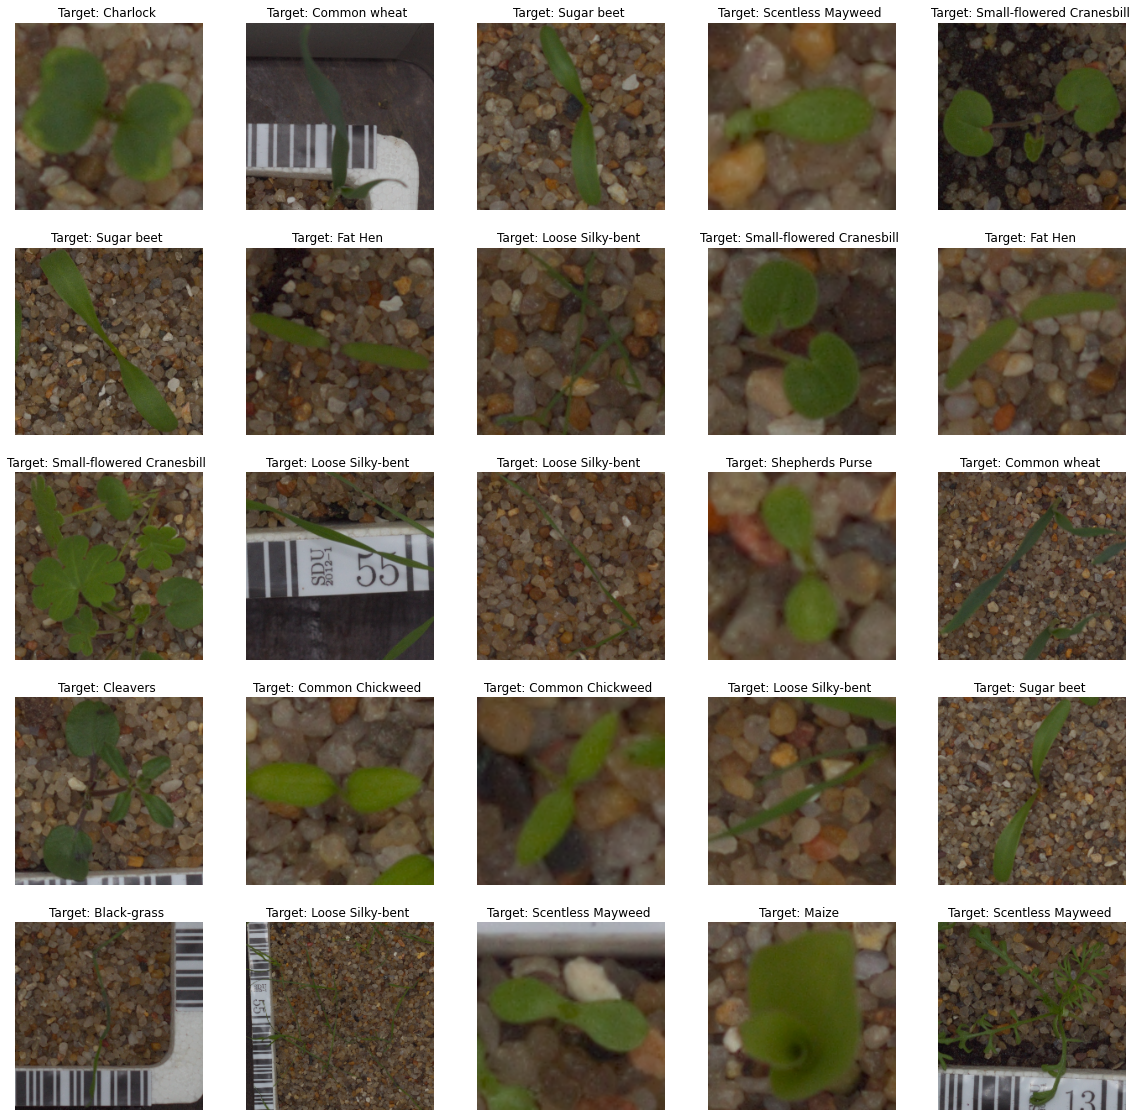

In [12]:
plt.figure(figsize = (20,20)) 
image, label = next(iter(train_data))
for i in range(0,25) : 
    
    ax = plt.subplot(5,5,i+1) 
    plt.imshow(image[i]/255.)
    plt.title(f"Target: {class_names[tf.argmax(label[i])]} ")
    ax.axis("off")

In [ ]:
# Plot of label types numbers


sns.set_style('darkgrid')  
ax = sns.countplot(x=0, data=pd.DataFrame(train_data))
ax.set_xticklabels(class_names)

plt.xticks(rotation=90)
plt.show()

Prepare a model with Efficient NetB0

In [61]:
base_model = tf.keras.applications.EfficientNetB0(include_top= False)

base_model.trainable = False 

inputs = tf.keras.layers.Input(shape=(224,224,3), name='Input_Layer') 

x = base_model(inputs) 

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(), 
             metrics=['accuracy']) 

model_history = model.fit(train_data, 
                          steps_per_epoch=len(train_data),
                          validation_data= valid_data,
                        validation_steps= len(valid_data),
                         epochs=5
                         )

Epoch 1/5
119/119 [==============================] - 352s 3s/step - loss: 1.5942 - accuracy: 0.5100 - val_loss: 0.9289 - val_accuracy: 0.8109
Epoch 2/5
119/119 [==============================] - 336s 3s/step - loss: 1.0394 - accuracy: 0.6904 - val_loss: 0.6888 - val_accuracy: 0.8288
Epoch 3/5
119/119 [==============================] - 339s 3s/step - loss: 0.8466 - accuracy: 0.7553 - val_loss: 0.5824 - val_accuracy: 0.8634
Epoch 4/5
119/119 [==============================] - 360s 3s/step - loss: 0.7368 - accuracy: 0.7936 - val_loss: 0.5235 - val_accuracy: 0.8813
Epoch 5/5
119/119 [==============================] - 368s 3s/step - loss: 0.6551 - accuracy: 0.8157 - val_loss: 0.4460 - val_accuracy: 0.8845


In [65]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 12)                15372     
                                                                 
Total params: 4,064,943
Trainable params: 15,372
Non-trainable params: 4,049,571
_________________________________________________________________


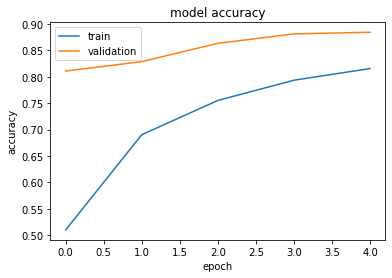

In [66]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(model_history)

Model accuracy is increasing as increase of the number of epochs

In [68]:
test = []
for file in os.listdir(test_path):
    test.append(['test/{}'.format(file), file])
test = pd.DataFrame(test, columns=['filepath', 'file'])
print(test.head(2))
test.shape

             filepath           file
0  test/007b3da8b.png  007b3da8b.png
1  test/003d61042.png  003d61042.png


(794, 2)

In [71]:
from tqdm import tqdm

x_test = np.zeros((len(test), 224, 224, 3), dtype='float32')
for i, filepath in tqdm(enumerate(test['filepath'])):
    img = keras.preprocessing.image.load_img(os.path.join(project_path, filepath), target_size = (224, 224))
    x = keras.preprocessing.image.img_to_array(img)
    x_test[i] = x
print('test Images shape: {} size: {:,}'.format(x_test.shape, x_test.size))

794it [05:34,  2.37it/s]

test Images shape: (794, 224, 224, 3) size: 119,519,232


In [73]:
prediction = model.predict(x_test)

In [74]:
prediction

array([[6.3504296e-04, 8.9462104e-05, 1.0005607e-03, ..., 8.5091582e-05,
        2.6215490e-05, 6.3102651e-01],
       [1.0112422e-02, 1.5664365e-04, 2.0890254e-04, ..., 7.6834163e-05,
        7.5046861e-05, 2.7143842e-01],
       [4.0295814e-05, 1.1544972e-02, 8.8073030e-02, ..., 7.2269780e-03,
        7.9645914e-01, 7.2883040e-04],
       ...,
       [1.0856182e-03, 2.0516360e-02, 1.4848503e-01, ..., 2.4949270e-01,
        1.5349042e-01, 4.1268165e-03],
       [1.7674171e-06, 9.4268376e-01, 3.6120109e-02, ..., 3.7718515e-03,
        1.0297217e-02, 9.4256051e-05],
       [2.2803444e-02, 3.7236020e-04, 8.1633264e-04, ..., 1.3896593e-04,
        8.2818355e-05, 3.6543891e-01]], dtype=float32)

In [76]:
prepredits = np.argmax(prediction, axis=1)
prediction = [class_names[i] for i in prepredits]
print(len(prediction))
print(prediction)

794
['Sugar beet', 'Fat Hen', 'Small-flowered Cranesbill', 'Fat Hen', 'Common Chickweed', 'Sugar beet', 'Loose Silky-bent', 'Fat Hen', 'Loose Silky-bent', 'Sugar beet', 'Charlock', 'Small-flowered Cranesbill', 'Loose Silky-bent', 'Sugar beet', 'Scentless Mayweed', 'Sugar beet', 'Scentless Mayweed', 'Sugar beet', 'Small-flowered Cranesbill', 'Common Chickweed', 'Small-flowered Cranesbill', 'Fat Hen', 'Sugar beet', 'Shepherds Purse', 'Sugar beet', 'Maize', 'Scentless Mayweed', 'Common Chickweed', 'Scentless Mayweed', 'Sugar beet', 'Fat Hen', 'Small-flowered Cranesbill', 'Loose Silky-bent', 'Black-grass', 'Sugar beet', 'Loose Silky-bent', 'Black-grass', 'Loose Silky-bent', 'Maize', 'Maize', 'Common Chickweed', 'Sugar beet', 'Common Chickweed', 'Sugar beet', 'Sugar beet', 'Fat Hen', 'Small-flowered Cranesbill', 'Scentless Mayweed', 'Maize', 'Maize', 'Fat Hen', 'Sugar beet', 'Charlock', 'Small-flowered Cranesbill', 'Loose Silky-bent', 'Loose Silky-bent', 'Cleavers', 'Cleavers', 'Common whea

In [80]:
predict = []
for file in os.listdir(predict_path):
    predict.append([format(file), file])
predict = pd.DataFrame(predict, columns=['filepath', 'file'])
print(predict.head(2))
predict.shape

      filepath         file
0  Predict.png  Predict.png


(1, 2)

In [81]:

x_predict = np.zeros((len(predict), 224, 224, 3), dtype='float32')
for i, filepath in tqdm(enumerate(predict['filepath'])):
    img = keras.preprocessing.image.load_img(os.path.join(predict_path, filepath), target_size = (224, 224))
    x = keras.preprocessing.image.img_to_array(img)
    x_predict[i] = x
print('test Images shape: {} size: {:,}'.format(x_predict.shape, x_predict.size))

1it [00:00, 30.69it/s]

test Images shape: (1, 224, 224, 3) size: 150,528


In [83]:
##pass the predict image to this model and check for the class name

prediction_final = model.predict(x_predict)
prepredits = np.argmax(prediction_final, axis=1)

class_names[prepredits[0]]


'Maize'

As seen above the CNN shows accurach of 88% and the image given to predict is predicted correctly.

### Supervised learning algorithms

Prepare the data for input into a supervised learning model

In [9]:
size=224
class Dataset:
    def __init__(self):
        self.x_path =  train_path
        self.classes = os.listdir(self.x_path)
        self.x_data = []
        self.y_data = []
        
    def __preprocessImage(self, image):
        image = np.array(image, dtype = "float32")
        image = cv2.resize(image, (size, size))
        image = np.reshape(image, (size, size, 3)) 
        image /= 255.0
        
        return np.array(image, dtype = "float32")
    
    def __extractImages(self, path):
        images = os.listdir(path)
        for image_path in images:
            image = cv2.imread(path + "/" + image_path)
            self.x_data.append(self.__preprocessImage(image))
            self.y_data.append(self.classes.index(path.split("/")[-1]))
    def load_data(self):
        i = 0
        for index in self.classes:
            i += 1
            self.__extractImages(self.x_path + "/" + index)   
            print(f"{(i / len(self.classes)) * 100}% Data Loaded, Index = {i}", end = "\r")
        
        #self.x_data = np.reshape(self.x_data, (np.shape(self.x_data)[0], 1, size, size, 3))
        self.x_data = np.array(self.x_data, dtype = "float32")
        #self.y_data = to_categorical(self.y_data)
        self.y_data=label_encoder.fit_transform(self.y_data) 
        self.y_data = np.array(self.y_data, dtype = "float32")
        
        print("Data Successfully Loaded")
        return train_test_split(self.x_data, self.y_data, random_state = 42)
    


In [ ]:
dataset = Dataset()
x_train, x_test, y_train, y_test = dataset.load_data()

In [86]:
print("x test shape",x_test.shape)
print("x train shape",x_train.shape)
print("y test shape",y_test.shape)
print("y train shape",y_train.shape)

x test shape (1190, 224, 224, 3)
x train shape (3570, 224, 224, 3)
y test shape (1190,)
y train shape (3570,)


In [21]:
x_train[0]

array([[[0.21568628, 0.36862746, 0.5254902 ],
        [0.20681024, 0.36123076, 0.5151348 ],
        [0.19304971, 0.34976366, 0.4990809 ],
        ...,
        [0.1648547 , 0.21975666, 0.2785802 ],
        [0.16714813, 0.22205009, 0.28087363],
        [0.16862746, 0.22352941, 0.28235295]],

       [[0.22160363, 0.37158617, 0.5180935 ],
        [0.21607591, 0.3658636 , 0.50885415],
        [0.20750633, 0.35699198, 0.4945306 ],
        ...,
        [0.17811264, 0.23159137, 0.29189426],
        [0.1795409 , 0.23388484, 0.2941877 ],
        [0.18046218, 0.23536414, 0.29566702]],

       [[0.23077731, 0.376173  , 0.50662637],
        [0.2304405 , 0.37304586, 0.4991174 ],
        [0.22991833, 0.36819795, 0.48747626],
        ...,
        [0.19866635, 0.24993874, 0.31253502],
        [0.19875339, 0.25223216, 0.31482846],
        [0.19880952, 0.2537115 , 0.31630775]],

       ...,

       [[0.16470589, 0.20392157, 0.26651785],
        [0.16163492, 0.20380929, 0.26350304],
        [0.15687403, 0

In [87]:
x_train = np.asarray(x_train).reshape(x_train.shape[0],size*size*3)
x_test = np.asarray(x_test).reshape(x_test.shape[0],size*size*3)

In [88]:
x_train[0]

array([0.21568628, 0.36862746, 0.5254902 , ..., 0.34117648, 0.41568628,
       0.45490196], dtype=float32)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [89]:
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [90]:
# Call Nearest Neighbour algorithm

knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [91]:
# Call Nearest Neighbour algorithm

knn.score(x_test, y_test)

0.2630252100840336

In [32]:
def __preprocessImage(image):
    image = np.array(image, dtype = "float32")
    image = cv2.resize(image, (size, size))
    image = np.reshape(image, (size, size, 3)) 
    image /= 255.0
    
    return np.array(image, dtype = "float32")

x_data_test = []
    
def __extractImages(path):
    global x_data_test
    image = cv2.imread(path)
    x_data_test.append(__preprocessImage(image))

In [33]:
##Pass the predict image to this modela dn check for the results

x_path = "/content/drive/My Drive/Colab Notebooks/Predict"
images = os.listdir(x_path)

for image in images:
    __extractImages(x_path + "/" + image)
x_data_test = np.array(x_data_test, dtype = "float32")

In [34]:
x_data_test

array([[[[0.2261102 , 0.29734862, 0.35961622],
         [0.2417849 , 0.30946696, 0.35878125],
         [0.260115  , 0.31583977, 0.366668  ],
         ...,
         [0.2921176 , 0.3941188 , 0.47046694],
         [0.26758322, 0.36408916, 0.45189694],
         [0.18477118, 0.25698504, 0.36596596]],

        [[0.2025299 , 0.27558663, 0.3437064 ],
         [0.24931324, 0.31307372, 0.3679757 ],
         [0.25090903, 0.305811  , 0.3605917 ],
         ...,
         [0.29730484, 0.39914438, 0.4694685 ],
         [0.31084174, 0.4112487 , 0.48440605],
         [0.21731171, 0.30369842, 0.39863873]],

        [[0.2239671 , 0.29239118, 0.35528845],
         [0.21278012, 0.27261904, 0.33548537],
         [0.2358813 , 0.29432914, 0.34586832],
         ...,
         [0.2988477 , 0.3972627 , 0.47120404],
         [0.31946933, 0.4177725 , 0.48695746],
         [0.20905153, 0.30462205, 0.39776465]],

        ...,

        [[0.24608374, 0.328244  , 0.38721982],
         [0.23229538, 0.3106553 , 0.37025172]

In [98]:
x_data_test = np.asarray(x_data_test).reshape(x_data_test.shape[0],224*224*3)
prediction1 = knn.predict(x_data_test)
#prepredits1 = np.argmax(prediction1[0])

prepredits1 = prediction1[0].astype(int)

prepredits1

8

In [99]:
class_names[prepredits1]

'Scentless Mayweed'

The Supervised learning has given an accuracy of 26% and also the name of the image of the prediction given is identifiied incorrectly as Scentless Mayweed

## Neural Network Model

Prepeare a NN model with layers defined as below

In [4]:
modelNN = Sequential()

In [5]:
#### Adding Batch normalization layer 

#Hidden Layer 1
modelNN.add(Flatten())
modelNN.add(Dense(512, kernel_initializer='he_normal'))#,input_shape = (1024, )))
modelNN.add(BatchNormalization())
#Adding Activation function
modelNN.add(Activation('relu'))

#Hidden Layer 2

modelNN.add(Dense(256, kernel_initializer='he_normal'))
modelNN.add(BatchNormalization())
#Adding Activation function
modelNN.add(Activation('relu'))

#Hidden Layer 3

modelNN.add(Dense(128, kernel_initializer='he_normal'))
modelNN.add(BatchNormalization())
#Adding Activation function
modelNN.add(Activation('relu'))

#Hidden Layer 4
#Adding third Hidden layer
modelNN.add(Dense(64, kernel_initializer='he_normal'))
modelNN.add(BatchNormalization())

modelNN.add(Activation('relu'))

#Hidden Layer 5

modelNN.add(Dense(32, kernel_initializer='he_normal'))
modelNN.add(BatchNormalization())
#Adding Activation function
modelNN.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
modelNN.add(Dense(12))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
modelNN.add(Activation('softmax'))

In [6]:
##prepare the test and train data as required by the NN

size=224
class Dataset:
    def __init__(self):
        self.x_path =  train_path
        self.classes = os.listdir(self.x_path)
        self.x_data = []
        self.y_data = []
        
    def __preprocessImage(self, image):
        image = np.array(image, dtype = "float32")
        image = cv2.resize(image, (size, size))
        image = np.reshape(image, (size, size, 3)) 
        image /= 255.0
        
        return np.array(image, dtype = "float32")
    
    def __extractImages(self, path):
        images = os.listdir(path)
        for image_path in images:
            image = cv2.imread(path + "/" + image_path)
            self.x_data.append(self.__preprocessImage(image))
            self.y_data.append(self.classes.index(path.split("/")[-1]))
    def load_data(self):
        i = 0
        for index in self.classes:
            i += 1
            self.__extractImages(self.x_path + "/" + index)   #\train\1'
            print(f"{(i / len(self.classes)) * 100}% Data Loaded, Index = {i}", end = "\r")
        
        #self.x_data = np.reshape(self.x_data, (np.shape(self.x_data)[0], 1, size, size, 3))
        self.x_data = np.array(self.x_data, dtype = "float32")
        self.y_data = to_categorical(self.y_data)
        self.y_data = np.array(self.y_data, dtype = "float32")
        
        print("Data Successfully Loaded")
        return train_test_split(self.x_data, self.y_data, random_state = 42)
    


In [7]:
## Define the data set once again
dataset = Dataset()
x_train1, x_test1, y_train1, y_test1 = dataset.load_data()

Data Successfully Loaded


In [8]:
print("x test shape",x_test1.shape)
print("x train shape",x_train1.shape)
print("y test shape",y_test1.shape)
print("y train shape",y_train1.shape)

x test shape (1190, 224, 224, 3)
x train shape (3570, 224, 224, 3)
y test shape (1190, 12)
y train shape (3570, 12)


In [9]:
# Compile the model
modelNN.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
modelNN.fit(x=x_train1, y=y_train1, batch_size=32, epochs=5, validation_data=(x_test1, y_test1))

Epoch 1/5
112/112 [==============================] - 46s 373ms/step - loss: 2.3164 - accuracy: 0.2431 - val_loss: 3.6717 - val_accuracy: 0.1504
Epoch 2/5
112/112 [==============================] - 41s 369ms/step - loss: 1.7751 - accuracy: 0.4473 - val_loss: 2.4279 - val_accuracy: 0.1941
Epoch 3/5
112/112 [==============================] - 40s 360ms/step - loss: 1.4941 - accuracy: 0.5515 - val_loss: 2.2333 - val_accuracy: 0.2622
Epoch 4/5
112/112 [==============================] - 39s 350ms/step - loss: 1.2420 - accuracy: 0.6619 - val_loss: 2.4176 - val_accuracy: 0.1975
Epoch 5/5
112/112 [==============================] - 40s 357ms/step - loss: 1.0483 - accuracy: 0.7277 - val_loss: 2.3157 - val_accuracy: 0.2555


In [10]:
modelNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 512)               77070848  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [11]:
results_1 = modelNN.evaluate(x_test1, y_test1)
print('Val_acc using Batch  : ', results_1[1])

38/38 [==============================] - 5s 129ms/step - loss: 2.3157 - accuracy: 0.2555
Val_acc using Batch  :  0.2554621994495392


In [ ]:
##Picke the best performing model

filename = 'finalized_cnn.sav'
pickle.dump(model, open(filename, 'wb'))

The Neural Network performance is at 25% on the test data, it does not classify the data as needed

Using KNN we are getting an accuracy of 25%

With Neural Network the accuracy was not very good

With the CNN the accuracy was around 88% and the prediction image was classified correctly. We can conclude that was the best model.

As the problem is of classification of images and also having weights etc retained ,transfer learning the standard supervised learning and NN do not do a good job of image classification